In [4]:
#import dependecies
import pandas as pd
import numpy as np
import json
import csv
import os
import time as t
from datetime import datetime
from config import api_key_meetup
from pandas.io.json import json_normalize
import requests
import logging
import matplotlib.pyplot as plt
import seaborn as sns
#pd.DataFrame.from_dict(json_normalize(list), orient='columns')

In [5]:
#export and load the df_sample csv
filepath = os.path.join("data_output","df_sample.csv")
df_sample = pd.read_csv(filepath)
df_sample.head()

,census_aland,census_aland_sqmi,census_awater,census_awater_sqmi,census_diversity_score,census_educational_score,census_geoid,census_intptlat,census_intptlong,census_median_age,census_median_household_income,census_population,top_category
0,53731552,20.746,2717798,1.049,0.233184,5.121376,1545,42.284767,-71.714228,40.5,94273.0,35963,Socializing
1,118316345,45.682,972969,0.376,0.013807,3.839525,65075,38.237326,-92.250624,37.9,64643.0,1014,Socializing
2,303225857,117.076,993181,0.383,0.132607,4.597581,99224,47.652359,-117.526002,37.0,58789.0,21379,Socializing
3,86544801,33.415,740836,0.286,0.097513,4.536801,32128,29.100739,-81.071829,51.5,64367.0,17731,Socializing
4,45026795,17.385,236022,0.091,0.202166,5.326425,36013,32.284669,-85.985235,40.5,127567.0,554,Others


In [110]:
# EXTRACT MEETUP EVENTS FOR THE SAMPLE GeoCoordinates

'''Searches for recent and upcoming public events hosted by Meetup groups. 
Its search window is the past one month through the next three months, 
and is subject to change. Open Events is optimized to search for current events by location, 
category, topic, or text, and only lists Meetups that have **3 or more RSVPs**. 
The number or results returned with each request is not guaranteed to be the same 
as the page size due to secondary filtering. 
If you're looking for a particular event or events within a particular group, 
use the standard [Events](/meetup_api/docs/2/events/) method.'''

# API host - EVENTS
events_list = []

#counter object
counter = 0

# loop through each zip
for index, row in df_sample.iterrows():
    # api host - find groups
    base_url = "https://api.meetup.com"
    method = "/2/open_events"

   #configuration
    params = {
            "lat" : row['census_intptlat'],
            "lon" : row['census_intptlong'],
            "key" : api_key_meetup,
        }
    
   # request the url
    response = requests.get(base_url + method, params=params)
    
   # check if the requests are within X-RateLimits
    if int(response.headers['X-RateLimit-Remaining']) <= 2:
        t.sleep(30)
    
    if counter %100 == 0:
        print(f'request #{counter}:{response.url}')

   #store the json in groups variable
    events = response.json()
    events = events['results']
        
    #increment the counter by 1
    counter += 1
    
    for event in events:
        events_list.append(event)

request #0:https://api.meetup.com/2/open_events?lat=42.284766999999995&lon=-71.714228&key=6178756c2f194627413177171e5f3f2f
request #100:https://api.meetup.com/2/open_events?lat=33.623208&lon=-117.933903&key=6178756c2f194627413177171e5f3f2f
request #200:https://api.meetup.com/2/open_events?lat=38.862373&lon=-91.31273900000001&key=6178756c2f194627413177171e5f3f2f
request #300:https://api.meetup.com/2/open_events?lat=43.150461&lon=-84.217431&key=6178756c2f194627413177171e5f3f2f
request #400:https://api.meetup.com/2/open_events?lat=30.393240000000002&lon=-86.47094&key=6178756c2f194627413177171e5f3f2f
request #500:https://api.meetup.com/2/open_events?lat=33.714236&lon=-113.721274&key=6178756c2f194627413177171e5f3f2f
request #600:https://api.meetup.com/2/open_events?lat=42.525338&lon=-76.840915&key=6178756c2f194627413177171e5f3f2f
request #700:https://api.meetup.com/2/open_events?lat=40.653518&lon=-112.01341200000002&key=6178756c2f194627413177171e5f3f2f
request #800:https://api.meetup.com/2/

In [111]:
df_events = pd.DataFrame.from_dict(json_normalize(events_list), orient='columns')

In [26]:
# export the df_events as a csv to data output folder
df_events.to_csv("data_output/df_events.csv", encoding="utf-8", index=False)

In [27]:
# load the df_events file into a dataframe
df_events = pd.read_csv("data_output/df_events.csv",low_memory=False)

In [28]:
display(df_events.head())
display(df_events.shape)

,created,description,distance,duration,event_url,fee.accepts,fee.amount,fee.currency,fee.description,fee.label,...,venue.lon,venue.name,venue.phone,venue.repinned,venue.state,venue.zip,visibility,waitlist_count,why,yes_rsvp_count
0,1510575045000,"<p>Come join MongoDB for <a href=""https://www....",24.891785,10800000.0,https://www.meetup.com/Boston-MongoDB-User-Gro...,NaN,NaN,NaN,NaN,NaN,...,-71.256271,Vistaprint,NaN,False,MA,NaN,public,0,NaN,22
1,1512344618000,<p>Join the team that builds MongoDB for an ev...,24.911028,9000000.0,https://www.meetup.com/Boston-Mobile-App-Devel...,NaN,NaN,NaN,NaN,NaN,...,-71.255791,Vistaprint,NaN,False,MA,02451,public,0,NaN,5
2,1504717565000,<p>This season come play volleyball starting f...,9.662161,9000000.0,https://www.meetup.com/Southborough-Volleyball...,NaN,NaN,NaN,NaN,NaN,...,-71.527367,Woodward School Gym,NaN,False,MA,NaN,public,0,NaN,16
3,1485460511000,<p>The Meetup attendee count does not include ...,21.620674,NaN,https://www.meetup.com/NewBeginningsWellesley/...,NaN,NaN,NaN,NaN,NaN,...,-71.292389,207 Washington Street,NaN,False,MA,NaN,public,0,NaN,3
4,1512164195000,"<p><img src=""https://secure.meetupstatic.com/p...",17.047792,9900000.0,https://www.meetup.com/Newton-Area-Divorce-Sup...,cash,15.0,USD,per person,Price,...,-71.382851,Margaritas Mexican Restaurant,NaN,False,MA,01701,public,0,NaN,9


(55354, 48)

In [29]:
#sample 1000 events at random
df_events_sample = df_events.sample(n=1000)

In [30]:
df_events_sample['timestamp_event']=''
df_events_sample['timestamp_event_weekday']=''

In [31]:
for index, row in df_events_sample.iterrows():
    unix_timestamp = str(row['time'])[:10]
    unix_timestamp = int(unix_timestamp)
    time = datetime.fromtimestamp(unix_timestamp)
    wday = time.strftime('%w')
    df_events_sample.set_value(index, 'timestamp_event', time)
    df_events_sample.set_value(index, 'timestamp_event_weekday', wday)

In [32]:
df_events_sample.iloc[25]

created                                                             1511617240000
description                     <p>Come enjoy an astronomer guided program as ...
distance                                                                  24.3811
duration                                                                  5.4e+06
event_url                       https://www.meetup.com/Meteor-Shower-Milky-Way...
fee.accepts                                                                   NaN
fee.amount                                                                    NaN
fee.currency                                                                  NaN
fee.description                                                               NaN
fee.label                                                                     NaN
fee.required                                                                  NaN
group.created                                                       1460562444000
group.group_lat 

In [35]:
# EXTRACT THE GROUP CATEGORY FOR EACH MEETUP EVENT
'''Fetch the category of the event using group endpoint'''

df_events_sample['category'] = ''

counter = 0

# loop through each event
for index, row in df_events_sample.iterrows():
    # api host - find groups
    base_url = "https://api.meetup.com"
    method = "/2/groups"

    #configuration
    params = {
            "group_id" : row['group.id'],
            "key" : api_key_meetup,
        }
    
    #request the url
    response = requests.get(base_url + method, params=params)
    
    #check if the requests are within X-RateLimits
    if int(response.headers['X-RateLimit-Remaining']) <= 2:
        t.sleep(30)
    
    if counter % 100 == 0:
        print(f'request #{counter}:{response.url}')

    try:
        #store the json in groups variable
        groups = response.json()
        category = groups['results'][0]['category']['name']
        df_events_sample.set_value(index,'category',category)
        
    except ValueError:
        msg='error'
        df_events_sample.set_value(index,'category',msg)
    
    #increment the counter by 1
    counter += 1

request #0:https://api.meetup.com/2/groups?group_id=17728182&key=6178756c2f194627413177171e5f3f2f
request #100:https://api.meetup.com/2/groups?group_id=1773457&key=6178756c2f194627413177171e5f3f2f
request #200:https://api.meetup.com/2/groups?group_id=2978662&key=6178756c2f194627413177171e5f3f2f
request #300:https://api.meetup.com/2/groups?group_id=1719658&key=6178756c2f194627413177171e5f3f2f
request #400:https://api.meetup.com/2/groups?group_id=14035072&key=6178756c2f194627413177171e5f3f2f
request #500:https://api.meetup.com/2/groups?group_id=19453356&key=6178756c2f194627413177171e5f3f2f
request #600:https://api.meetup.com/2/groups?group_id=18276537&key=6178756c2f194627413177171e5f3f2f
request #700:https://api.meetup.com/2/groups?group_id=1576571&key=6178756c2f194627413177171e5f3f2f
request #800:https://api.meetup.com/2/groups?group_id=25273189&key=6178756c2f194627413177171e5f3f2f
request #900:https://api.meetup.com/2/groups?group_id=3287522&key=6178756c2f194627413177171e5f3f2f


In [42]:
df_events_sample.iloc[22]

created                                                             1509034669000
description                     <p>Come join us for our annual winter holiday ...
distance                                                                  6.75791
duration                                                                    9e+06
event_url                       https://www.meetup.com/Innovative-Networking-P...
fee.accepts                                                                  cash
fee.amount                                                                     10
fee.currency                                                                  USD
fee.description                                                        per person
fee.label                                                                   Price
fee.required                                                                    0
group.created                                                       1385053227000
group.group_lat 

In [40]:
# export the df_events as a csv to data output folder
df_events_sample.to_csv("data_output/df_events_sample.csv", encoding="utf-8", index=False)

In [41]:
# load the df_events file into a dataframe
df_events_sample = pd.read_csv("data_output/df_events_sample.csv",low_memory=False)

In [22]:
df_events_sample.head()

,created,description,distance,duration,event_url,fee.accepts,fee.amount,fee.currency,fee.description,fee.label,...,venue.lon,venue.name,venue.phone,venue.repinned,venue.state,venue.zip,visibility,waitlist_count,why,yes_rsvp_count
0,1510575045000,"<p>Come join MongoDB for <a href=""https://www....",24.891785,10800000.0,https://www.meetup.com/Boston-MongoDB-User-Gro...,NaN,NaN,NaN,NaN,NaN,...,-71.256271,Vistaprint,NaN,False,MA,NaN,public,0,NaN,22
1,1512344618000,<p>Join the team that builds MongoDB for an ev...,24.911028,9000000.0,https://www.meetup.com/Boston-Mobile-App-Devel...,NaN,NaN,NaN,NaN,NaN,...,-71.255791,Vistaprint,NaN,False,MA,02451,public,0,NaN,5
2,1504717565000,<p>This season come play volleyball starting f...,9.662161,9000000.0,https://www.meetup.com/Southborough-Volleyball...,NaN,NaN,NaN,NaN,NaN,...,-71.527367,Woodward School Gym,NaN,False,MA,NaN,public,0,NaN,16
3,1485460511000,<p>The Meetup attendee count does not include ...,21.620674,NaN,https://www.meetup.com/NewBeginningsWellesley/...,NaN,NaN,NaN,NaN,NaN,...,-71.292389,207 Washington Street,NaN,False,MA,NaN,public,0,NaN,3
4,1512164195000,"<p><img src=""https://secure.meetupstatic.com/p...",17.047792,9900000.0,https://www.meetup.com/Newton-Area-Divorce-Sup...,cash,15.0,USD,per person,Price,...,-71.382851,Margaritas Mexican Restaurant,NaN,False,MA,01701,public,0,NaN,9


In [68]:
# selet the category types that had atleast 25 events out of the 1000 events
category_types = df_events_sample.groupby('category').agg({"timestamp_event_weekday":'count'}).reset_index()
category_types = category_types[category_types['timestamp_event_weekday']>25]
category_types = category_types[category_types['category'] != 'error']
category_types

,category,timestamp_event_weekday
3,career/business,118
11,fitness,37
12,food/drink,31
13,games,74
14,health/wellbeing,36
16,language/ethnic identity,31
19,music,26
20,new age/spirituality,47
21,outdoors/adventure,79
26,religion/beliefs,28


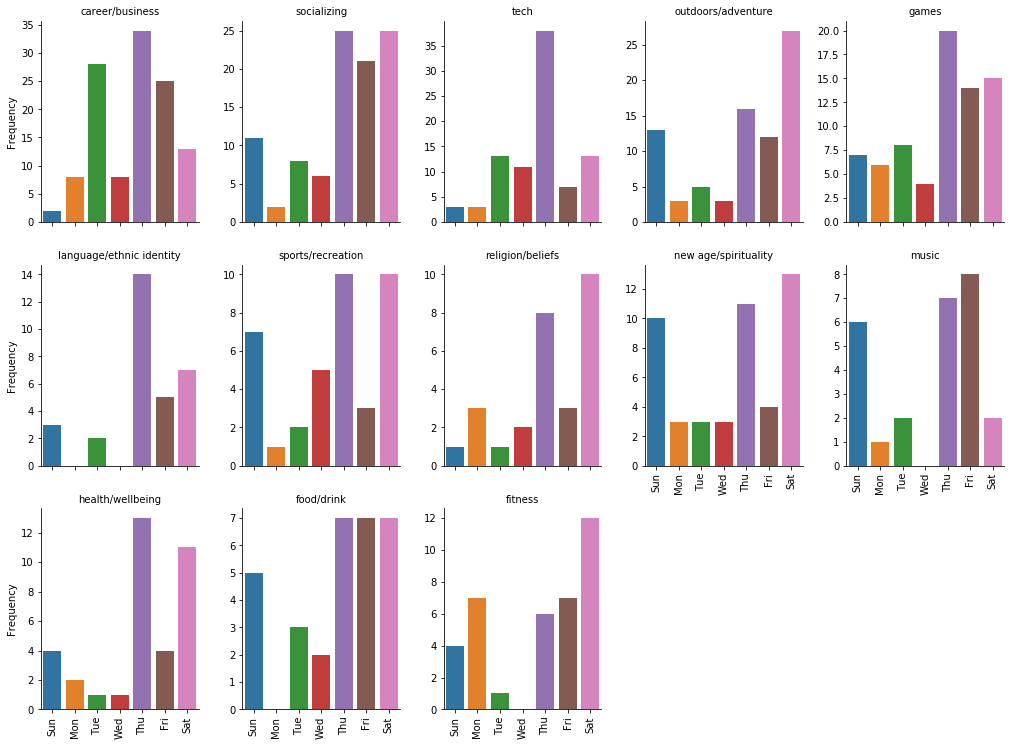

In [77]:
data_selected = df_events_sample[df_events_sample['category'].isin(category_types['category'])]

g = sns.factorplot('timestamp_event_weekday', col="category", col_wrap=5,
                    data= data_selected,kind="count", size=3.5, aspect=.8,sharey=False)

g.set_xticklabels(["Sun","Mon","Tue","Wed","Thu","Fri","Sat"],rotation=90)
g.set_titles("{col_name}")
g.set_axis_labels("", "Frequency")
plt.savefig('data_images/plot7_dayoftheweek.png',bbox_inches='tight')
plt.show(); #0 is Sunday and 6 is Saturday.